In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('bike_rent (1) (1).csv')

In [2]:
# Describe the dataset
print("Dataset Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nFirst 5 Rows:\n", data.head())

Dataset Shape: (17379, 17)

Columns:
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Data Types:
 instant        int64
dteday        object
season        object
yr            object
mnth          object
hr             int64
holiday       object
weekday        int64
workingday    object
weathersit    object
temp          object
atemp         object
hum           object
windspeed     object
casual        object
registered    object
cnt            int64
dtype: object

First 5 Rows:
    instant      dteday    season    yr mnth  hr holiday  weekday workingday  \
0        1  01-01-2011  springer  2011    1   0      No        6    No work   
1        2  01-01-2011  springer  2011    1   1      No        6    No work   
2        3  01-01-2011  springer  2011    1   2      No        6    No work   
3        4  01-01-2011  springer

## EDA

In [3]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicate records
duplicates = data.duplicated().sum()
print("\nNumber of duplicate records:", duplicates)

# Summary statistics
print("\nSummary Statistics:\n", data.describe())


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Number of duplicate records: 0

Summary Statistics:
           instant            hr       weekday           cnt
count  17379.0000  17379.000000  17379.000000  17379.000000
mean    8690.0000     11.546752      3.003683    189.463088
std     5017.0295      6.914405      2.005771    181.387599
min        1.0000      0.000000      0.000000      1.000000
25%     4345.5000      6.000000      1.000000     40.000000
50%     8690.0000     12.000000      3.000000    142.000000
75%    13034.5000     18.000000      5.000000    281.000000
max    17379.0000     23.000000      6.000000    977.000000


In [4]:
# Handle missing values (example: forward fill for time-series data)
data.fillna(method='ffill', inplace=True)
print("\nMissing Values After Imputation:\n", data.isnull().sum())

# Detect outliers (using IQR method as an example)
def detect_outliers(df, column):
    # Ensure the column is numeric
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    # Check if column has numeric values before calculating IQR
    if df[column].dtype in ['float64', 'int64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    else:
        print(f"Column {column} is not numeric. Skipping outlier detection.")
        return pd.DataFrame()  # Return an empty DataFrame if the column is not numeric

numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in numeric_columns:
    outliers = detect_outliers(data, col)
    print(f"\nOutliers in {col}: {len(outliers)}")



Missing Values After Imputation:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Outliers in temp: 0

Outliers in atemp: 0

Outliers in hum: 22

Outliers in windspeed: 341

Outliers in casual: 1192

Outliers in registered: 680

Outliers in cnt: 505


## Visualization

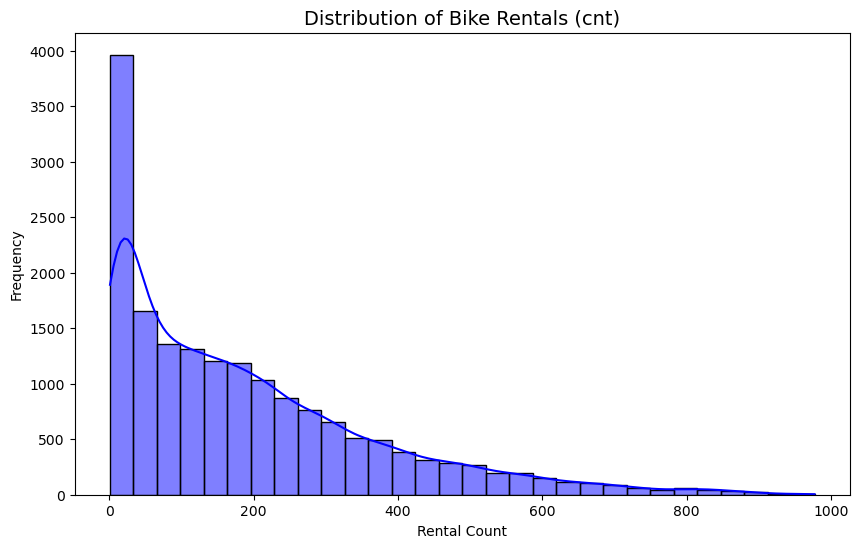

In [5]:
# Distribution of the target variable 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Bike Rentals (cnt)', fontsize=14)
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()


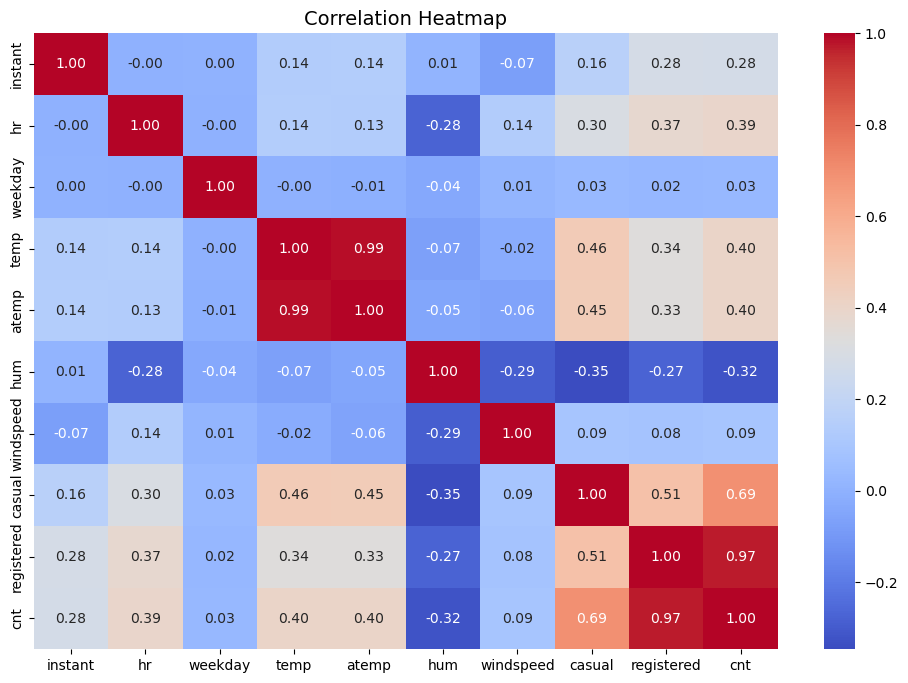

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

/var/folders/qj/j7w1j7yd7ld42vvk0nbs_qpm0000gn/T/ipykernel_2924/721587388.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['dteday'] = pd.to_datetime(data['dteday'])  # Ensure 'dteday' is in datetime format


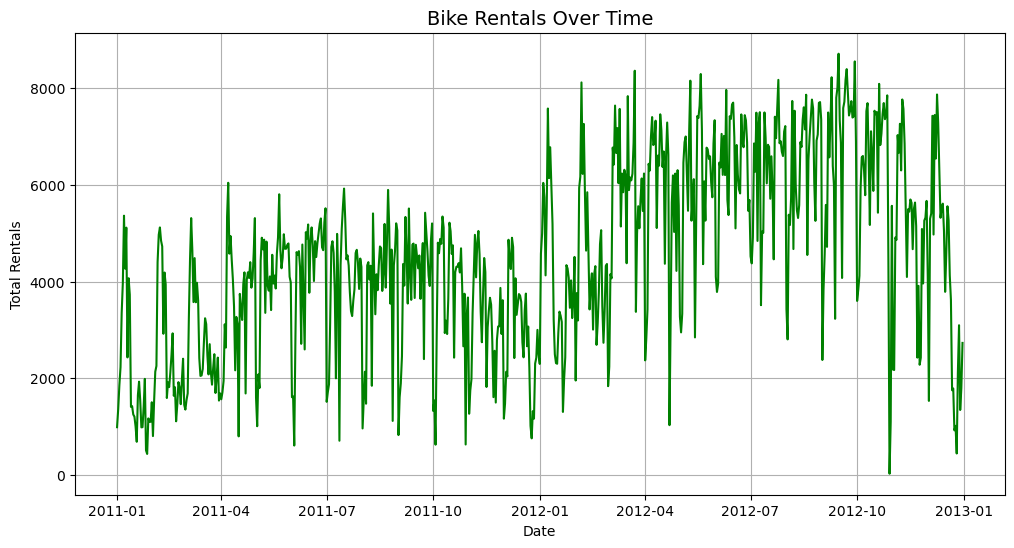

In [7]:
# Time-series analysis (if 'dteday' is the time variable)
data['dteday'] = pd.to_datetime(data['dteday'])  # Ensure 'dteday' is in datetime format
time_data = data.groupby('dteday')['cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(time_data['dteday'], time_data['cnt'], color='green')
plt.title('Bike Rentals Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.grid()
plt.show()



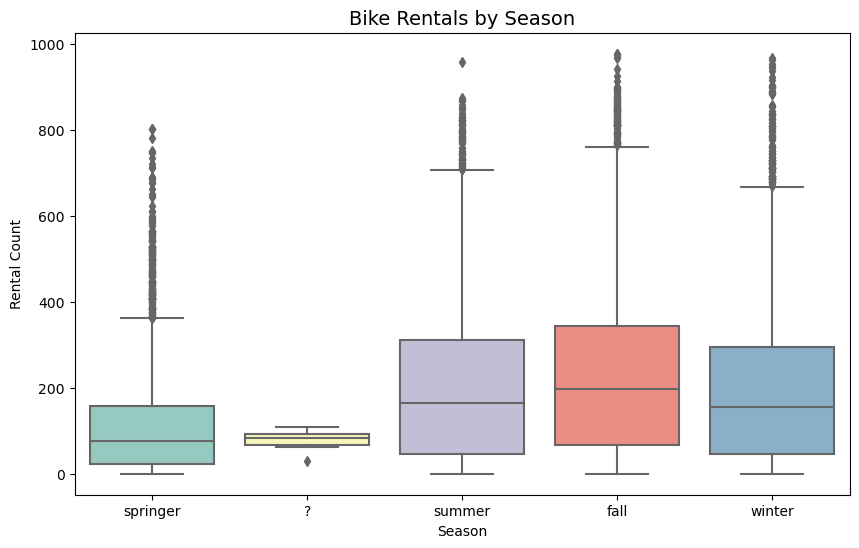

In [8]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=data, palette='Set3')
plt.title('Bike Rentals by Season', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Rental Count')
plt.show()


## Model Building


Linear Regression Performance:
Mean Absolute Error (MAE): 114.86
Mean Squared Error (MSE): 23436.79
Root Mean Squared Error (RMSE): 153.09
R² Score: 0.26

Random Forest Performance:
Mean Absolute Error (MAE): 119.42
Mean Squared Error (MSE): 26824.72
Root Mean Squared Error (RMSE): 163.78
R² Score: 0.15

XGBoost Performance:
Mean Absolute Error (MAE): 110.94
Mean Squared Error (MSE): 22228.82
Root Mean Squared Error (RMSE): 149.09
R² Score: 0.30

Decision Tree Performance:
Mean Absolute Error (MAE): 129.34
Mean Squared Error (MSE): 32361.41
Root Mean Squared Error (RMSE): 179.89
R² Score: -0.02

SVR Performance:
Mean Absolute Error (MAE): 107.20
Mean Squared Error (MSE): 23672.92
Root Mean Squared Error (RMSE): 153.86
R² Score: 0.25

Gradient Boosting Performance:
Mean Absolute Error (MAE): 110.50
Mean Squared Error (MSE): 22094.10
Root Mean Squared Error (RMSE): 148.64
R² Score: 0.30


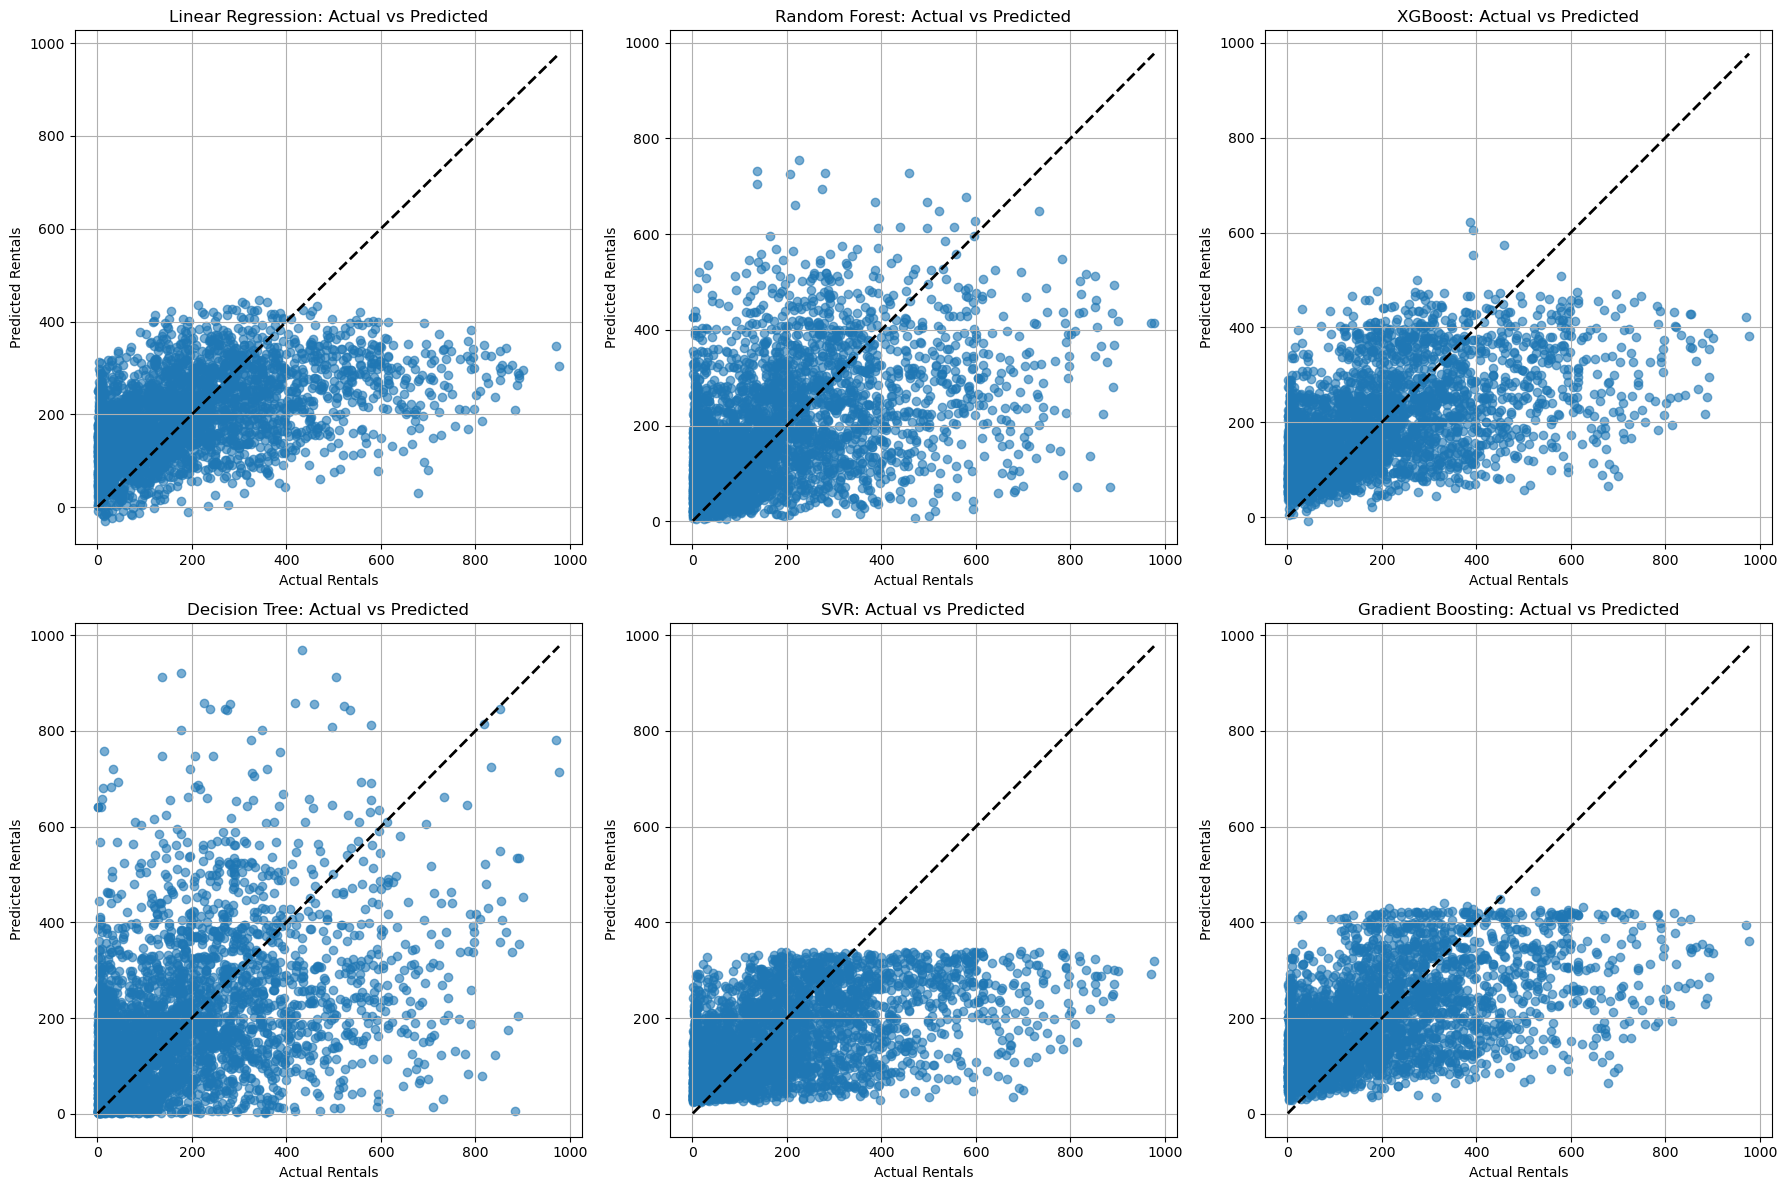

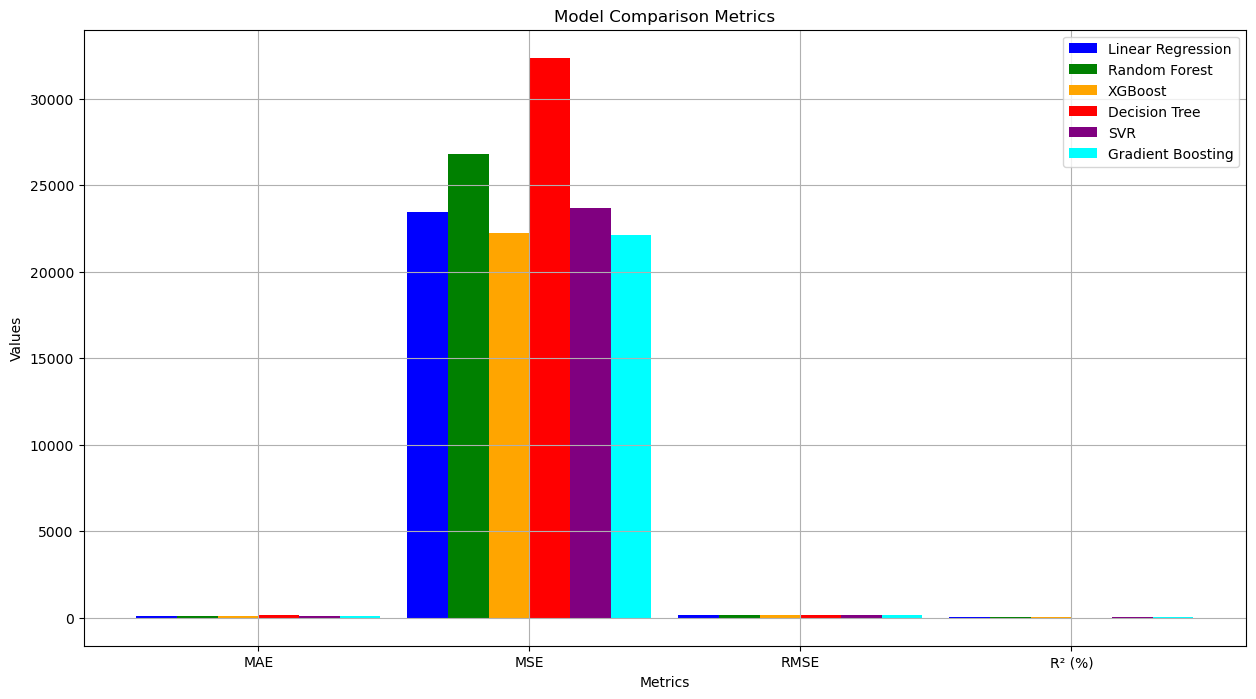

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure numeric columns have no missing values
# Replace 'data' with your actual dataset
data = pd.read_csv('bike_rent (1) (1).csv')  # Example: Replace with your dataset
X = data[['temp', 'atemp', 'hum', 'windspeed']].apply(pd.to_numeric, errors='coerce')
y = data['cnt']  # Target variable

# Handle missing values with imputation (mean strategy)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models Initialization
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.2),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Evaluate Models
metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics[model_name] = (mae, mse, rmse, r2)

    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

# Visualization of Predictions vs. Actual for Each Model
plt.figure(figsize=(18, 12))
for i, (model_name, model) in enumerate(models.items(), start=1):
    y_pred = model.predict(X_test)
    plt.subplot(2, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.xlabel("Actual Rentals")
    plt.ylabel("Predicted Rentals")
    plt.grid()

plt.tight_layout()
plt.show()

# Bar Graph for Model Comparisons
metrics_labels = ['MAE', 'MSE', 'RMSE', 'R² (%)']
x = np.arange(len(metrics_labels))
width = 0.15

plt.figure(figsize=(15, 8))
colors = ['blue', 'green', 'orange', 'red', 'purple', 'cyan']
for i, (model_name, values) in enumerate(metrics.items()):
    metric_values = list(values[:-1]) + [values[-1] * 100]  # Convert R² to percentage
    plt.bar(x + (i * width), metric_values, width, label=model_name, color=colors[i])

plt.title("Model Comparison Metrics")
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.xticks(x + (width * (len(models) - 1)) / 2, metrics_labels)
plt.legend()
plt.grid()
plt.show()


# Feature Engineering

In [10]:
# Feature Engineering
# Extract additional features from the date column if it exists
if 'Dteday' in data.columns:
    data['Dteday'] = pd.to_datetime(data['Dteday'])
    data['Year'] = data['Dteday'].dt.year
    data['Month'] = data['Dteday'].dt.month
    data['Day'] = data['Dteday'].dt.day
    data['Weekday'] = data['Dteday'].dt.weekday
    data['Is_Weekend'] = data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Encode categorical variables
if 'Season' in data.columns:
    data = pd.get_dummies(data, columns=['Season'], drop_first=True)
if 'Weathersit' in data.columns:
    data = pd.get_dummies(data, columns=['Weathersit'], drop_first=True)

# Normalize numerical columns
for col in ['Temp', 'Atemp', 'Hum', 'Windspeed']:
    if col in data.columns:
        data[col] = (data[col] - data[col].mean()) / data[col].std()

# Combine Casual and Registered into Total Users
if 'Casual' in data.columns and 'Registered' in data.columns:
    data['Total_Users'] = data['Casual'] + data['Registered']

print("\nFeature Engineering Completed. Updated Columns:\n", data.columns)



Feature Engineering Completed. Updated Columns:
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


# Hyperparameter Tuning

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Ensure all features are numeric
X = data.drop(columns=['cnt', 'casual', 'registered', 'dteday'], errors='ignore')

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Ensure the target variable is numeric
y = pd.to_numeric(data['cnt'], errors='coerce')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=2, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
accuracy_level = r2 * 100  # Convert R² score to a percentage for interpretability

print("\nBest Parameters:", random_search.best_params_)
print("\nRMSE:", rmse)
print("R2 Score:", r2)
print(f"Accuracy Level: {accuracy_level:.2f}%")


Fitting 2 folds for each of 20 candidates, totalling 40 fits

Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}

RMSE: 44.59587645823995
R2 Score: 0.9371935461078669
Accuracy Level: 93.72%


# Model Deploying

In [12]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
